# Алгоритм отжига
**Алгоритм имитации отжига** (англ. Simulated annealing) — общий алгоритмический метод решения задачи глобальной оптимизации, особенно дискретной и комбинаторной оптимизации.

Алгоритм основывается на имитации физического процесса, который происходит при кристаллизации вещества, в том числе при отжиге металлов. Предполагается, что атомы уже выстроились в кристаллическую решётку, но ещё допустимы переходы отдельных атомов из одной ячейки в другую. Предполагается, что процесс протекает при постепенно понижающейся температуре. 

Алгоритм позволяет нам с большой вероятностью избежать «застревания» в локальном минимуме.


## Пример использования алгоритма отжига


Импортирование библиотек

In [171]:
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

Входные данные:

Seed - генератор псевдослучайных чисел;

bounds - границы;

n_iterations - количество итераций;

step_size - максимальный шаг;

temp - начальная температура;

In [172]:
seed(1)
bounds = asarray([[-5.0, 5.0]])
n_iterations = 1000
step_size = 0.1
temp = 10

Обозначим основную функцию. Будем использовать функцию x^2

In [173]:
def objective(x):
	return x[0]**2.0

Начало алгоритма с генерацией и оцениванием начальной точки

Запуск алгоритма и вычисление лучших точек

In [174]:
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
	best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	best_eval = objective(best)
	curr, curr_eval = best, best_eval
	scores = list()
	for i in range(n_iterations):
		candidate = curr + randn(len(bounds)) * step_size
		candidate_eval = objective(candidate)
		if candidate_eval < best_eval:
			best, best_eval = candidate, candidate_eval
			scores.append(best_eval)
			print('>%d f(%s) = %.5f' % (i, best, best_eval))
		diff = candidate_eval - curr_eval
		t = temp / float(i + 1)
		metropolis = exp(-diff / t)
		if diff < 0 or rand() < metropolis:
			curr, curr_eval = candidate, candidate_eval
	return [best, best_eval, scores]

Значения для графика

In [176]:
best, score, scores = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Конец')
print('f(%s) = %f' % (best, score))

>34 f([-0.78753544]) = 0.62021
>35 f([-0.76914239]) = 0.59158
>37 f([-0.68574854]) = 0.47025
>39 f([-0.64797564]) = 0.41987
>40 f([-0.58914623]) = 0.34709
>41 f([-0.55446029]) = 0.30743
>42 f([-0.41775702]) = 0.17452
>43 f([-0.35038542]) = 0.12277
>50 f([-0.15799045]) = 0.02496
>66 f([-0.11089772]) = 0.01230
>67 f([-0.09238208]) = 0.00853
>72 f([-0.09145261]) = 0.00836
>75 f([-0.05129162]) = 0.00263
>93 f([-0.02854417]) = 0.00081
>144 f([0.00864136]) = 0.00007
>149 f([0.00753953]) = 0.00006
>167 f([-0.00640394]) = 0.00004
>225 f([-0.00044965]) = 0.00000
>503 f([-0.00036261]) = 0.00000
>512 f([0.00013605]) = 0.00000
Конец
f([0.00013605]) = 0.000000


График

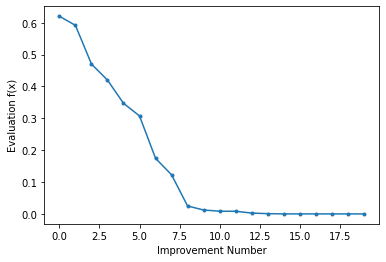

In [175]:
pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()